100%|██████████| 300/300 [00:15<00:00, 19.82it/s]


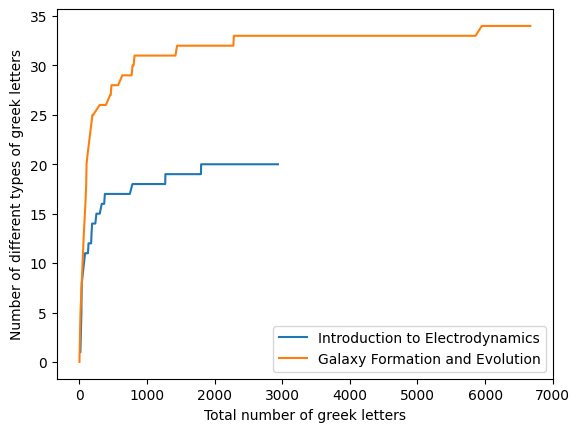

In [1]:
import PyPDF2
import re
import tqdm
import numpy as np
import matplotlib.pyplot as plt
# Open the PDF file1
pdf_file1 = open('G:\My Drive\Thesis work\Books\electrodynamics.pdf', 'rb')
# Open the PDF file2
pdf_file2 = open('G:\My Drive\Thesis work\Books\galaxy_formation.pdf', 'rb')
# Create a PDF reader object
pdf_reader1 = PyPDF2.PdfReader(pdf_file1)
pdf_reader2 = PyPDF2.PdfReader(pdf_file2)
# Read the text from the PDF file
text1 = ''
text2 = ''
#Pages containing main content in each book
len1=np.arange(20,603)
len2=np.arange(22,796)
#Randomly select 300 pages from each book and count the number of types of greek letters in each page as well as the total number of greek letters in each page
pages1=np.random.choice(len1,300)
pages2=np.random.choice(len2,300)
#Show the progress bar
total1=[0]
greek_symbol_counts1 = {}
no_species1=0
no_speciestot1=[]
#For book1
for page_num in tqdm.tqdm(pages1):
    page = pdf_reader1.pages[int(page_num)]
    text1 = page.extract_text()
    #Find all the greek letters in each page
    greek_symbols1 = re.findall('[\u0370-\u03FF]', text1)
    #Add total number of greek letters in each page to the list
    total1.append(total1[-1]+len(greek_symbols1))
    #Count the number of different types of greek letters in each page
    for symbol in greek_symbols1:
        if symbol in greek_symbol_counts1:
            greek_symbol_counts1[symbol] += 1
        else:
            no_species1+=1
            greek_symbol_counts1[symbol] = 1
    no_speciestot1.append(no_species1)
#For book2 repeat the same process
total2=[0]
greek_symbol_counts2 = {}
no_species2=0
no_speciestot2=[]
for page_num in tqdm.tqdm(pages2):
    page = pdf_reader2.pages[int(page_num)]
    text2 = page.extract_text()
    greek_symbols2 = re.findall('[\u0370-\u03FF]', text2)
    total2.append(total2[-1]+len(greek_symbols2))
    for symbol in greek_symbols2:
        if symbol in greek_symbol_counts2:
            greek_symbol_counts2[symbol] += 1
        else:
            no_species2+=1
            greek_symbol_counts2[symbol] = 1
    no_speciestot2.append(no_species2)
#Plot total vs no_speciestot
plt.plot(total1[1:],no_speciestot1,label='Introduction to Electrodynamics')
plt.plot(total2[1:],no_speciestot2,label='Galaxy Formation and Evolution')
plt.xlabel('Total number of greek letters')
plt.ylabel('Number of different types of greek letters')
plt.legend()
plt.show()


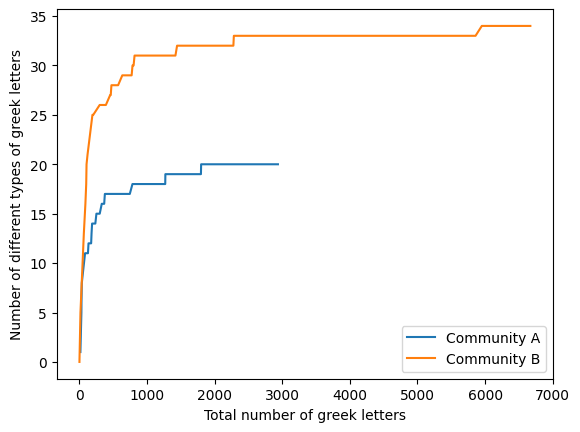

In [18]:
plt.plot(total1[1:],no_speciestot1,label='Community A')
plt.plot(total2[1:],no_speciestot2,label='Community B')
plt.xlabel('Total number of greek letters')
plt.ylabel('Number of different types of greek letters')
plt.legend()
plt.show()

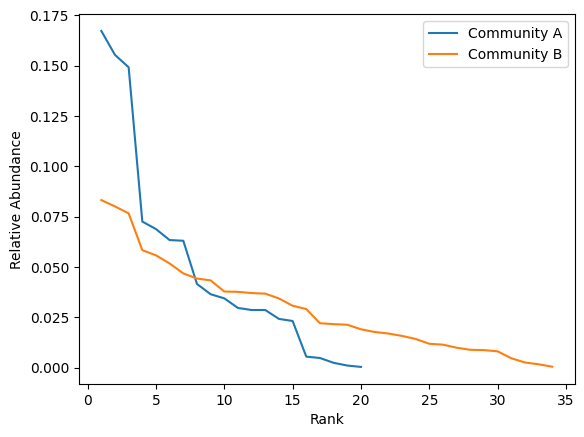

In [19]:
#Sort both the dictionaries in descending order of the number of times each Greek symbol is used in the text
sorted_greek_symbol_counts1 = sorted(greek_symbol_counts1.items(), key=lambda x: x[1], reverse=True)
sorted_greek_symbol_counts2 = sorted(greek_symbol_counts2.items(), key=lambda x: x[1], reverse=True)
#Plot rank abundance curve for both the books
Relative_abundance1=np.array([i[1] for i in sorted_greek_symbol_counts1])/total1[-1]
Relative_abundance2=np.array([i[1] for i in sorted_greek_symbol_counts2])/total2[-1]
plt.plot(np.arange(1,len(sorted_greek_symbol_counts1)+1),Relative_abundance1,label='Community A')
plt.plot(np.arange(1,len(sorted_greek_symbol_counts2)+1),Relative_abundance2,label='Community B')
plt.xlabel('Rank')
plt.ylabel('Relative Abundance')
plt.legend()
plt.show()



In [25]:
#Show Relative abundance in table format
import pandas as pd
df1=pd.DataFrame({'Greek symbol':[i[0] for i in sorted_greek_symbol_counts1],'Relative abundance':Relative_abundance1})
df2=pd.DataFrame({'Greek symbol':[i[0] for i in sorted_greek_symbol_counts2],'Relative abundance':Relative_abundance2})
print('Community A')
print(df1)


Community A
   Greek symbol  Relative abundance
0             μ            0.167234
1             π            0.155313
2             θ            0.149183
3             φ            0.072548
4             σ            0.068801
5             ρ            0.063351
6             ω            0.063011
7             τ            0.041553
8             λ            0.036444
9             α            0.034401
10            δ            0.029632
11            χ            0.028610
12            γ            0.028610
13            β            0.024183
14            ν            0.023161
15            η            0.005450
16            κ            0.004768
17            Δ            0.002384
18            ψ            0.001022
19            ε            0.000341


In [24]:
print('Community B')
print(df2)

Community B
   Greek symbol  Relative abundance
0             δ            0.083208
1             ν            0.080060
2             ρ            0.076612
3             γ            0.058321
4             α            0.055772
5             τ            0.051724
6             Ω            0.046777
7             λ            0.044228
8             μ            0.043328
9             σ            0.037781
10            π            0.037631
11            β            0.037031
12            ξ            0.036732
13            Φ            0.034333
14            ε            0.030735
15            Δ            0.029085
16            Λ            0.022039
17            Σ            0.021589
18            φ            0.021289
19            ω            0.019040
20            θ            0.017691
21            κ            0.016942
22            ϕ            0.015742
23            Ψ            0.014243
24            Γ            0.011844
25            ζ            0.011394
26            η 

# Simpson's Index

In [3]:
simpsons_index1=1/sum(Relative_abundance1**2)
equitability1=simpsons_index1/len(sorted_greek_symbol_counts1)
simpsons_index2=1/sum(Relative_abundance2**2)
equitability2=simpsons_index2/len(sorted_greek_symbol_counts2)

print('Introduction to Electrodynamics: ')
print('Simpsons index: ',simpsons_index1)
print('Equitability: ',equitability1)
print('Galaxy Formation and Evolution: ')
print('Simpsons index: ',simpsons_index2)
print('Equitability: ',equitability2)

Introduction to Electrodynamics: 
Simpsons index:  9.974123108466802
Equitability:  0.4987061554233401
Galaxy Formation and Evolution: 
Simpsons index:  21.560361296425707
Equitability:  0.6341282734242855


# Shannon Diversity Index

In [4]:
#Shannon diversity index
H1=-sum(Relative_abundance1*np.log(Relative_abundance1))
H2=-sum(Relative_abundance2*np.log(Relative_abundance2))
equitability1=H1/np.log(len(sorted_greek_symbol_counts1))
equitability2=H2/np.log(len(sorted_greek_symbol_counts2))
print('Introduction to Electrodynamics: ')
print('Shannon diversity index: ',H1)
print('Equitability: ',equitability1)
print('Galaxy Formation and Evolution: ')
print('Shannon diversity index: ',H2)
print('Equitability: ',equitability2)


Introduction to Electrodynamics: 
Shannon diversity index:  2.527301153859722
Equitability:  0.8436338507851554
Galaxy Formation and Evolution: 
Shannon diversity index:  3.235366654603765
Equitability:  0.9174803971457028


# The letters that were considered for this study(Just for reference)

In [26]:
#Print all the greek symbols in both the books along with their abundance in the text
print('Introduction to Electrodynamics: ')
#Display the greek symbols in a tabular format
print('Symbol\t\tCount\t\tSymbol\t\tCount')
try:
    for i in range(0,len(sorted_greek_symbol_counts1),2):
        print(sorted_greek_symbol_counts1[i][0],'\t\t',sorted_greek_symbol_counts1[i][1],end='\t\t')
        print(sorted_greek_symbol_counts1[i+1][0],'\t\t',sorted_greek_symbol_counts1[i+1][1])

    print('Galaxy Formation and Evolution: ')
    print('Symbol\t\tCount\t\tSymbol\t\tCount\t\tSymbol\t\tCount')
    for i in range(0,len(sorted_greek_symbol_counts2),3):
        print(sorted_greek_symbol_counts2[i][0],'\t\t',sorted_greek_symbol_counts2[i][1],end='\t\t')
        print(sorted_greek_symbol_counts2[i+1][0],'\t\t',sorted_greek_symbol_counts2[i+1][1],end='\t\t')
        print(sorted_greek_symbol_counts2[i+2][0],'\t\t',sorted_greek_symbol_counts2[i+2][1])
except IndexError:
    pass

Introduction to Electrodynamics: 
Symbol		Count		Symbol		Count
μ 		 491		π 		 456
θ 		 438		φ 		 213
σ 		 202		ρ 		 186
ω 		 185		τ 		 122
λ 		 107		α 		 101
δ 		 87		χ 		 84
γ 		 84		β 		 71
ν 		 68		η 		 16
κ 		 14		Δ 		 7
ψ 		 3		ε 		 1
Galaxy Formation and Evolution: 
Symbol		Count		Symbol		Count		Symbol		Count
δ 		 555		ν 		 534		ρ 		 511
γ 		 389		α 		 372		τ 		 345
Ω 		 312		λ 		 295		μ 		 289
σ 		 252		π 		 251		β 		 247
ξ 		 245		Φ 		 229		ε 		 205
Δ 		 194		Λ 		 147		Σ 		 144
φ 		 142		ω 		 127		θ 		 118
κ 		 113		ϕ 		 105		Ψ 		 95
Γ 		 79		ζ 		 76		η 		 66
ϑ 		 59		χ 		 58		Θ 		 54
Π 		 31		ϒ 		 17		ψ 		 11
ϖ 		 3		